In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#!pip install graphviz
!pip install pydotplus

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import  graphviz

import warnings
warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
wine = pd.read_csv(r"C:\Users\onkar\Downloads\WineQT.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [11]:
# Exploratory Data Analysis
classes = wine['quality'].unique().tolist()
classes

[5, 6, 7, 4, 8, 3]

In [13]:
wine.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [19]:
# Create the Predictor and Target sets
# Putting feature variable to X
X = wine.drop('quality',axis=1)

# Putting response variable to y
y = wine['quality']

In [21]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
28,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,40
1047,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,1470
593,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,827
1133,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,1584
288,8.8,0.52,0.34,2.7,0.087,24.0,122.0,0.99820,3.26,0.61,9.5,414


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_wine = DecisionTreeClassifier()
dt_wine.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Making Predictions on Training set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_train = dt_wine.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00       336
           6       1.00      1.00      1.00       327
           7       1.00      1.00      1.00        94
           8       1.00      1.00      1.00        14

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[  5   0   0   0   0   0]
 [  0  24   0   0   0   0]
 [  0   0 336   0   0   0]
 [  0   0   0 327   0   0]
 [  0   0   0   0  94   0]
 [  0   0   0   0   0  14]]
1.0


In [29]:
# Making predictions on the Test Data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default = dt_wine.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.11      0.13         9
           5       0.70      0.67      0.68       147
           6       0.56      0.60      0.58       135
           7       0.43      0.39      0.41        49
           8       0.00      0.00      0.00         2

    accuracy                           0.58       343
   macro avg       0.31      0.29      0.30       343
weighted avg       0.59      0.58      0.58       343



In [31]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[ 0  0  1  0  0  0]
 [ 1  1  1  6  0  0]
 [ 1  4 98 34  9  1]
 [ 0  1 34 81 15  4]
 [ 0  0  6 23 19  1]
 [ 0  0  0  1  1  0]]
0.5801749271137027


In [37]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image  
from six import StringIO 
features = list(X_train.columns)
dot_data = StringIO()  
export_graphviz(dt_wine, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
# Finding optimum max_depth
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [44]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004054,0.003582,0.003329,0.003201,1,{'max_depth': 1},0.54375,0.60000,0.56250,0.61250,...,0.56375,0.040389,1,0.584375,0.581250,0.570312,0.578125,0.606250,0.584062,0.012038
1,0.011673,0.003561,0.005133,0.004272,2,{'max_depth': 2},0.52500,0.59375,0.56875,0.58125,...,0.54500,0.050062,6,0.593750,0.598437,0.581250,0.590625,0.610938,0.595000,0.009753
2,0.011465,0.007686,0.003649,0.004472,3,{'max_depth': 3},0.55625,0.58125,0.56250,0.50000,...,0.53875,0.035223,7,0.617188,0.637500,0.629687,0.639062,0.643750,0.633437,0.009302
3,0.009945,0.003066,0.006474,0.006044,4,{'max_depth': 4},0.60000,0.56250,0.55000,0.58125,...,0.56125,0.029686,2,0.667188,0.664062,0.681250,0.653125,0.673438,0.667813,0.009406
4,0.014694,0.003052,0.007954,0.007210,5,{'max_depth': 5},0.56250,0.58750,0.54375,0.49375,...,0.53625,0.037375,8,0.698438,0.735938,0.715625,0.706250,0.717187,0.714688,0.012601


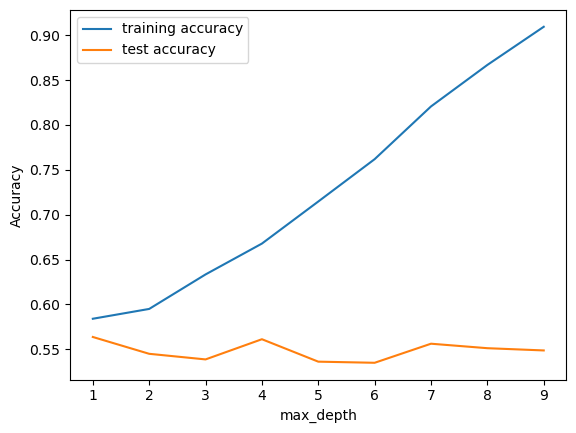

In [46]:
import matplotlib.pyplot as plt# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [50]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021715,0.010111,0.005333,0.004618,1,{'min_samples_leaf': 1},0.59375,0.59375,0.48750,0.53750,...,0.54750,0.041193,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.019764,0.006281,0.009770,0.005838,4,{'min_samples_leaf': 4},0.55625,0.56250,0.50625,0.56250,...,0.53875,0.026634,13,0.840625,0.839063,0.820312,0.846875,0.846875,0.838750,0.009753
2,0.017278,0.008088,0.011823,0.009512,7,{'min_samples_leaf': 7},0.62500,0.62500,0.55625,0.55625,...,0.57750,0.040427,2,0.768750,0.765625,0.765625,0.785937,0.767188,0.770625,0.007743
3,0.014038,0.003473,0.007892,0.007133,10,{'min_samples_leaf': 10},0.63125,0.58750,0.54375,0.56250,...,0.57375,0.032930,3,0.725000,0.726562,0.742188,0.739062,0.746875,0.735938,0.008672
4,0.012690,0.007749,0.004738,0.006311,13,{'min_samples_leaf': 13},0.61250,0.55625,0.55625,0.49375,...,0.54875,0.039410,11,0.714063,0.700000,0.710938,0.717187,0.726562,0.713750,0.008638


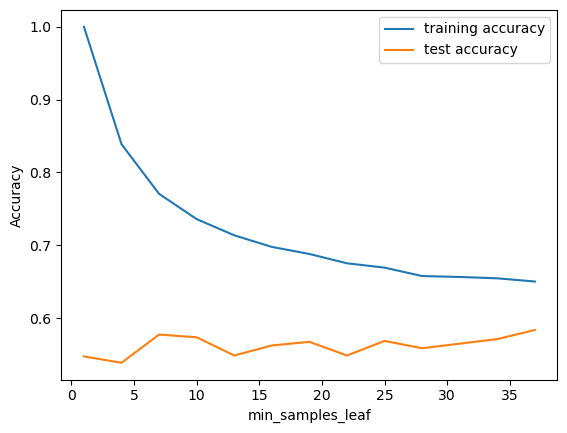

In [52]:
import matplotlib.pyplot as plt# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
# Tuning min_samples_split

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [56]:
# Print the results of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020042,0.010137,0.003194,0.002225,3,{'min_samples_split': 3},0.61250,0.56250,0.48125,0.5500,...,0.54500,0.043910,11,0.975000,0.981250,0.973437,0.964063,0.971875,0.973125,0.005538
1,0.023071,0.004322,0.007557,0.006504,6,{'min_samples_split': 6},0.58750,0.58750,0.49375,0.5500,...,0.54500,0.039410,10,0.918750,0.937500,0.909375,0.915625,0.918750,0.920000,0.009396
2,0.025343,0.006407,0.007771,0.007006,9,{'min_samples_split': 9},0.61875,0.54375,0.50625,0.5375,...,0.54375,0.040117,12,0.881250,0.882812,0.857812,0.876563,0.878125,0.875313,0.009025
3,0.026030,0.006168,0.006274,0.005659,12,{'min_samples_split': 12},0.61875,0.55625,0.47500,0.5500,...,0.54125,0.048830,13,0.859375,0.862500,0.834375,0.854688,0.840625,0.850313,0.010933
4,0.021315,0.008590,0.005782,0.007155,15,{'min_samples_split': 15},0.66875,0.56250,0.45000,0.5500,...,0.55125,0.070534,6,0.814063,0.834375,0.806250,0.814063,0.826562,0.819062,0.010049


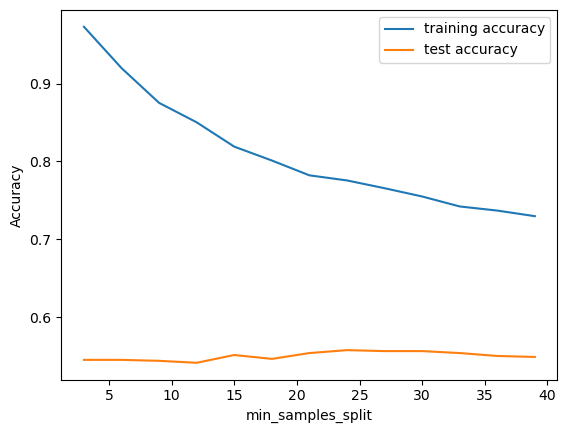

In [58]:
import matplotlib.pyplot as plt# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [63]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004575,0.004141,0.005481,0.003115,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.56250,0.5875,0.5625,0.58125,0.49375,0.5575,0.033401,2898
1,0.016802,0.003259,0.006196,0.003282,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.56250,0.5875,0.5625,0.58125,0.49375,0.5575,0.033401,2898
2,0.010834,0.006230,0.007092,0.004789,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.56250,0.5875,0.5625,0.58125,0.49375,0.5575,0.033401,2898
3,0.010748,0.006008,0.008465,0.004069,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.56250,0.5875,0.5625,0.58125,0.49375,0.5575,0.033401,2898
4,0.010809,0.009037,0.001706,0.002922,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.56250,0.5875,0.5625,0.58125,0.49375,0.5575,0.033401,2898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.013995,0.008193,0.001000,0.002000,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.61875,0.5750,0.5750,0.59375,0.52500,0.5775,0.030771,787
5036,0.006320,0.009362,0.003156,0.006312,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.61875,0.5750,0.5750,0.59375,0.52500,0.5775,0.030771,787
5037,0.012804,0.006402,0.006377,0.007811,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.61875,0.5750,0.5750,0.59375,0.52500,0.5775,0.030771,787
5038,0.015869,0.000938,0.007686,0.007129,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.61875,0.5750,0.5750,0.59375,0.52500,0.5775,0.030771,787


In [66]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.595
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=25)


In [68]:
# Running the model with best parameters obtained from grid search
# model with optimal hyperparameters
iristree1 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=3,
                                  min_samples_split=2)
iristree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [70]:
# accuracy score
iristree1.score(X_test,y_test)

0.5393586005830904

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(iristree1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [74]:
# tree with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=4,
                                  min_samples_split=4)
iristree2.fit(X_train, y_train)

# score
print(iristree2.score(X_test,y_test))

0.5189504373177842


In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(iristree2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [78]:
# Classification Metrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = iristree1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.22      0.21         9
           5       0.65      0.65      0.65       147
           6       0.48      0.47      0.47       135
           7       0.44      0.49      0.47        49
           8       0.00      0.00      0.00         2

    accuracy                           0.54       343
   macro avg       0.30      0.31      0.30       343
weighted avg       0.54      0.54      0.54       343



In [80]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[ 0  0  1  0  0  0]
 [ 0  2  2  5  0  0]
 [ 0  4 96 41  6  0]
 [ 0  3 47 63 22  0]
 [ 0  1  2 22 24  0]
 [ 0  0  0  0  2  0]]
